Customer Segmentation Problem Statement
We have a transactional dataset that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The company wants to segment its customers and determine marketing strategies according to these segments.

The dataset consists of the following attributes:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice date and time. Numeric, the day and time when each transaction was generated. The date-time format used here is yyyy-mm-dd hh:mm:ss.

UnitPrice: Unit price. Numeric, product price per unit in pound sterling, also known as GBP (Great Britain Pound).

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

Dataset Credits: https://archive.ics.uci.edu/ml/datasets/online+retail

Citation: Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.



In [2]:
# Read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("online-retail-customers.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Get the total number of rows and columns, datatypes of columns and missing values (if exist) in the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are 541909 rows and 8 columns and some columns have missing values in the dataset. We will deal with these missing values in the upcoming section. Let us first deal with cancelled orders.

As per the dataset description, some of the values in field InvoiceNo may start with the letter 'C', to indicate cancelled orders. To search for the rows in the dataset where the InvoiceNo starts with 'C', we will use Regular Expressions.

The InvoiceNo field has integer values but to find the cancelled orders using RegEx, it has to be converted to string data type.

In [4]:
# Convert 'InvoiceNo' field to string and verify whether the data type is converted or not.
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
type(df['InvoiceNo'][0])

str

The values of the InvoiceNo column has now been converted into a string. Next, let's search for the InvoiceNo that contains C using Regular Expressions.

In [5]:
#  Use regex to find 'C' in the 'InvoiceNo' field
import re
df[df['InvoiceNo'].str.contains(pat = 'C', flags = re.IGNORECASE)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In the output, there are 9288 orders whose InvoiceNo contains 'C'. Thus, there are 9288 cancelled orders.


In [6]:
# Remove cancelled invoices from the dataset
df = df[~(df['InvoiceNo'].str.contains('C', flags = re.IGNORECASE, regex = True))]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Thus, we obtained a DataFrame of 532621 rows consisting of delivered orders. Let us now remove the null values from the DataFrame.

In [7]:
# Obtain the number of missing or null values in df
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

In [8]:
#  Remove the null valued rows.
print(f"Before removing null values:\nNumber of rows = {df.shape[0]}")
df.dropna(inplace = True)
print(f"After removing null values:\nNumber of rows = {df.shape[0]}")

#  Again obtain the number of null values in df.
df.isnull().sum()

Before removing null values:
Number of rows = 532621
After removing null values:
Number of rows = 397924


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# Check the data type of CustomerID column.
df['CustomerID'].dtype

dtype('float64')

The CustomerID column is of float data type. We need to convert it into integer-based categorical column as CustomerID cannot be a floating-point value.

In [10]:
# Convert 'CustomerID' field to integer based categorical column.
df['CustomerID'] = df['CustomerID'].astype('int64')
df['CustomerID'].dtype

dtype('int64')

RFM analysis

In [11]:
# Check the first 5 samples of the DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Calculating Monetary:

Monetary value is how much money a customer spends on purchases.

To calculate the monetary value, we first need to calculate the total purchase value for the customers. This can be obtained by multiplying the values of the Quantity column by the UnitPrice column.

In [12]:
#  Obtain the the total purchase amount for the customers
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Now we have a new column named: TotalPrice which indicates the total amount spent by each customer.

For Monetary, calculate the amount for all the purchases made by every individual customer. For this, first, let us check how many customers do we have in our dataset.

In [13]:
# Obtain the number of unique customers
len(df['CustomerID'].unique())

4339

Here we can see that there 4340 categories which imply that our dataset has 4339 unique customers. The next step is to calculate the total purchase amount spent by these 4339 customers. For this,

In [14]:
#  Obtain the Monetary information from the DataFrame
monetary_df = df[['CustomerID', 'TotalPrice']].groupby('CustomerID', as_index = False).sum()
monetary_df.rename(columns = {'TotalPrice' : 'Monetary'}, inplace = True)
monetary_df

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2094.88


Thus, we have now obtained a DataFrame that tells us the total amount spent by each customer. We can easily differentiate between heavy spenders and low spenders using the monetary_df DataFrame.

Let us get the frequency of purchase for respective customers.

In [15]:
#  Obtain the Frequency information from the DataFrame
frequency_df =  df[['CustomerID', 'InvoiceNo']].groupby('CustomerID', as_index = False).count()
frequency_df.rename(columns = {'InvoiceNo': 'Frequency'}, inplace = True)
frequency_df

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,756


hus, we obtained a DataFrame that shows the frequency of purchases made by each unique customer.

Let us merge the above 2 DataFrames i.e. monetary_df and frequency_df into a single DataFrame. 

In [16]:
#  Merge 'monetary_df' and 'frequency_df' DataFrames.
rfm_df = pd.merge(monetary_df, frequency_df, on='CustomerID', how = 'inner')
rfm_df.head()

,CustomerID,Monetary,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


Now that we have obtained monetary and frequency values for RFM analysis, let us proceed with calculating the last factor i.e recency for our dataset.

In [17]:
# Obtain the last purchase date for each customer
recency_df = df[['CustomerID', 'InvoiceDate']].groupby('CustomerID', as_index = False).max()
recency_df.rename(columns = {'InvoiceDate': 'LastPurchaseDate'}, inplace = True)
recency_df

,CustomerID,LastPurchaseDate
0,12346,2011-01-18 10:01:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
4334,18280,2011-03-07 09:52:00
4335,18281,2011-06-12 10:53:00
4336,18282,2011-12-02 11:43:00
4337,18283,2011-12-06 12:02:00


Now, we have obtained a DataFrame that shows the last purchase date of each customer. But for recency, we need the number of days between the last purchase date and the present date (or a reference date).

First, find out the last invoice date in the dataset from the InvoiceDate column.

In [18]:
#  Obtain the last invoice date in the dataset.
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Since the last invoice date is 2011–12–09, we will consider 2011–12–10 as the present date to calculate recency.

In [19]:
#  Obtain the present date i.e LastPurchaseDate + 1 day
present_date = df['InvoiceDate'].max() + pd.Timedelta("1 day")
present_date

Timestamp('2011-12-10 12:50:00')

Now, we have both the dates i.e. the last purchase date of each customer (recency_df['LastPurchaseDate']) and the present date (present_date). We can now easily calculate the number of days that have passed since the customer's last purchase.

In [20]:
#  Obtain the days since last purchase made by a customer
days_last_purchase = present_date - recency_df['LastPurchaseDate'] 
days_last_purchase

0      326 days 02:49:00
1        2 days 20:58:00
2       75 days 23:37:00
3       19 days 02:59:00
4      310 days 20:49:00
              ...       
4334   278 days 02:58:00
4335   181 days 01:57:00
4336     8 days 01:07:00
4337     4 days 00:48:00
4338    43 days 03:21:00
Name: LastPurchaseDate, Length: 4339, dtype: timedelta64[ns]

In [21]:
#  Extract days from datetime using 'dt.days' attribute
recency_days = days_last_purchase.dt.days
recency_days

0       326
1         2
2        75
3        19
4       310
       ... 
4334    278
4335    181
4336      8
4337      4
4338     43
Name: LastPurchaseDate, Length: 4339, dtype: int64

In [22]:
# Add 'recency_days' as column to the merged DataFrame 'rfm_df'.
rfm_df['Recency'] = recency_days
rfm_df

,CustomerID,Monetary,Frequency,Recency
0,12346,77183.60,1,326
1,12347,4310.00,182,2
2,12348,1797.24,31,75
3,12349,1757.55,73,19
4,12350,334.40,17,310
...,...,...,...,...
4334,18280,180.60,10,278
4335,18281,80.82,7,181
4336,18282,178.05,12,8
4337,18283,2094.88,756,4


We now have a DataFrame for RFM analysis consisting of the necessary fields to carry out the customer segmentation.

Data Analysis

For clustering, the CustomerID field is not required hence it can be dropped from the rfm_df DataFrame.

In [23]:
# Dropping the 'CustomerID' column
rfm_df.drop(columns = 'CustomerID', inplace = True)
rfm_df

,Monetary,Frequency,Recency
0,77183.60,1,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
...,...,...,...
4334,180.60,10,278
4335,80.82,7,181
4336,178.05,12,8
4337,2094.88,756,4


Let's create histogram and boxplots to understand the distribution of Monetary, Frequency, and Recency columns.

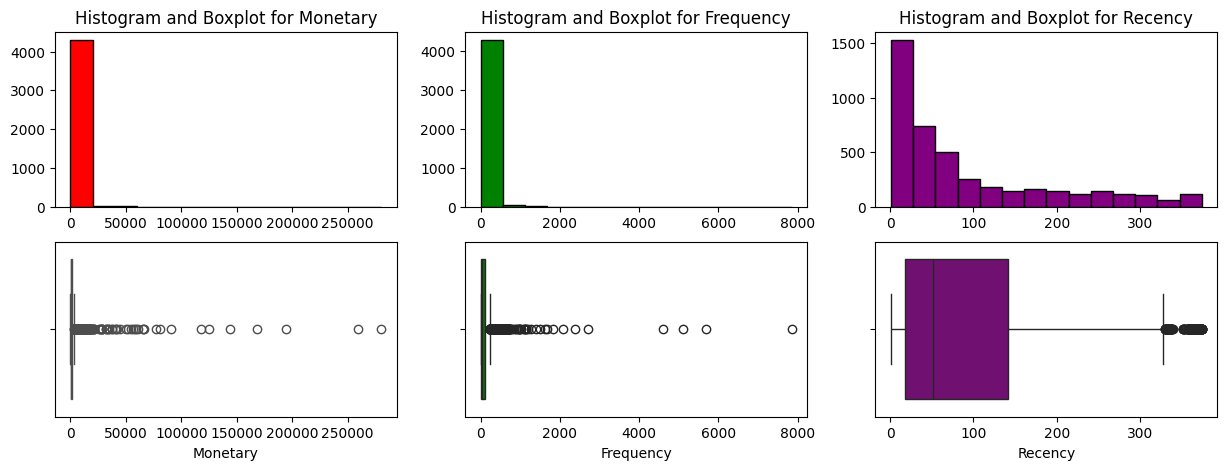

In [24]:
#  Obtain the histogram and boxplots
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 5), dpi = 100)

# Construct Histogram and Boxplot for 'Monetary'
axis[0, 0].hist(rfm_df['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'Monetary', data = rfm_df, ax = axis[1, 0], color = 'red')
axis[0, 0].set_title("Histogram and Boxplot for Monetary")

# Construct Histogram and Boxplot for 'Frequency'
axis[0, 1].hist(rfm_df['Frequency'], bins = 'sturges', facecolor = 'green', edgecolor = 'black')
sns.boxplot(x = 'Frequency', data = rfm_df, ax = axis[1, 1], color = 'green')
axis[0, 1].set_title("Histogram and Boxplot for Frequency")

# Construct Histogram and Boxplot for 'Recency'
axis[0, 2].hist(rfm_df['Recency'], bins = 'sturges', facecolor = 'purple', edgecolor = 'black')
sns.boxplot(x = 'Recency', data = rfm_df, ax = axis[1, 2], color = 'purple')
axis[0, 2].set_title("Histogram and Boxplot for Recency")

plt.show()

From the above plot it is clear there are lot of outliers in Monetary and Frequency fields.

These outliers will affect the model as the K-Means clustering is based on the distance of data points from the cluster centroids. These outliers will shift the cluster centroids away from their intended positions thereby generating inaccurate clusters. To compensate for this we need to remove the outliers.

Removing Outliers

In [25]:
#  Create a function for removing the outliers.
def remove_outliers(df, col):
  q1 = df[col].quantile(0.25)  # Q1
  q3 = df[col].quantile(0.75)  # Q3
  iqr = q3 - q1                # IQR = Q3 - Q1
  lower_bound =  q1 - 1.5 * iqr  # lower_bound = Q1 − 1.5 * IQR
  upper_bound = q3 + 1.5 * iqr  # upper_bound = Q3 + 1.5 * IQR
  new_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  return new_df

In [26]:
#  Removing outliers from 'Monetary' field
m_clean_df = remove_outliers(rfm_df, 'Monetary').reset_index(drop = True)
m_clean_df

,Monetary,Frequency,Recency
0,1797.24,31,75
1,1757.55,73,19
2,334.40,17,310
3,2506.04,85,36
4,89.00,4,204
...,...,...,...
3907,180.60,10,278
3908,80.82,7,181
3909,178.05,12,8
3910,2094.88,756,4


The rfm_df had 4339 rows and after removal of outliers m_clean_df has 3912 rows which means there were  4339−3912=427  outliers in the Monetary field.

Let us again create boxplots for the Recency, Monetary, and Frequency field and observe whether there is any improvement in data distribution.

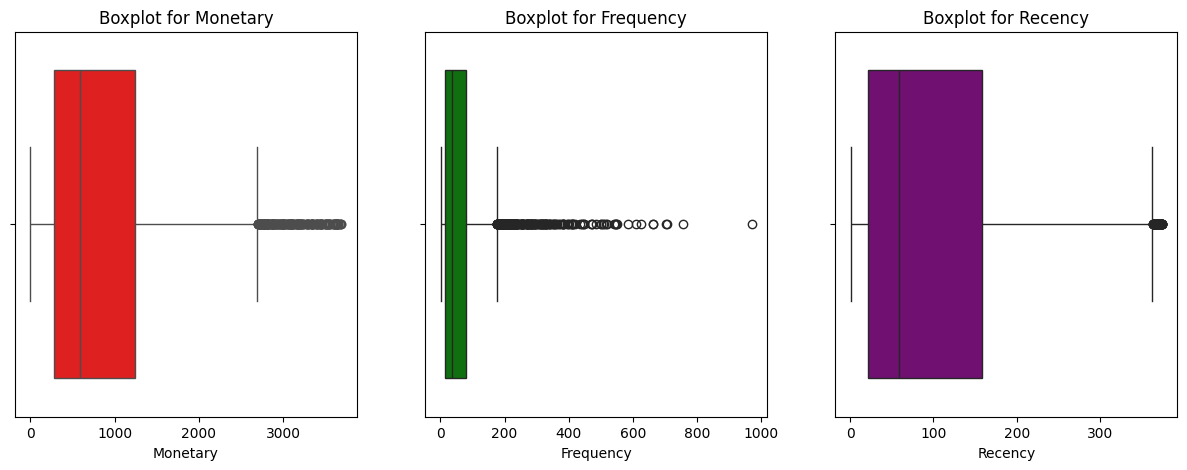

In [27]:
#  Obtain the boxplots
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5), dpi = 100)

# Construct Boxplot for 'Monetary'
sns.boxplot(x = 'Monetary', data = m_clean_df, ax = axis[0], color = 'red')
axis[0].set_title("Boxplot for Monetary")

# Construct Boxplot for 'Frequency'
sns.boxplot(x = 'Frequency', data = m_clean_df, ax = axis[1], color = 'green')
axis[1].set_title("Boxplot for Frequency")

# Construct Boxplot for 'Recency'
sns.boxplot(x = 'Recency', data = m_clean_df, ax = axis[2], color = 'purple')
axis[2].set_title("Boxplot for Recency")

plt.show()

We can observe that lot of outliers has been removed from the Monetary and Frequency columns.
Next, let us standardise the DataFrame, so that all the columns have mean equals to 0 and the standard deviation equals to 1. For this,

In [28]:
#  Normalise the RFM parameters
# Import StandardScaler Module from sklearn
from sklearn.preprocessing import StandardScaler

# Make an object 'StandardScaler()'
standard_scaler = StandardScaler()

# Perform fit and transform operation using 'fit_transform()'
scaled_values = standard_scaler.fit_transform(m_clean_df)

# Make a new DataFrame
scaled_df = pd.DataFrame(scaled_values)
scaled_df.columns = m_clean_df.columns
scaled_df

,Monetary,Frequency,Recency
0,1.099421,-0.394646,-0.244806
1,1.051512,0.148701,-0.796176
2,-0.666340,-0.575761,2.068980
3,1.954997,0.303943,-0.628796
4,-0.962557,-0.743940,1.025315
...,...,...,...
3907,-0.851989,-0.666319,1.753911
3908,-0.972431,-0.705130,0.798859
3909,-0.855067,-0.640446,-0.904481
3910,1.458695,8.984552,-0.943865


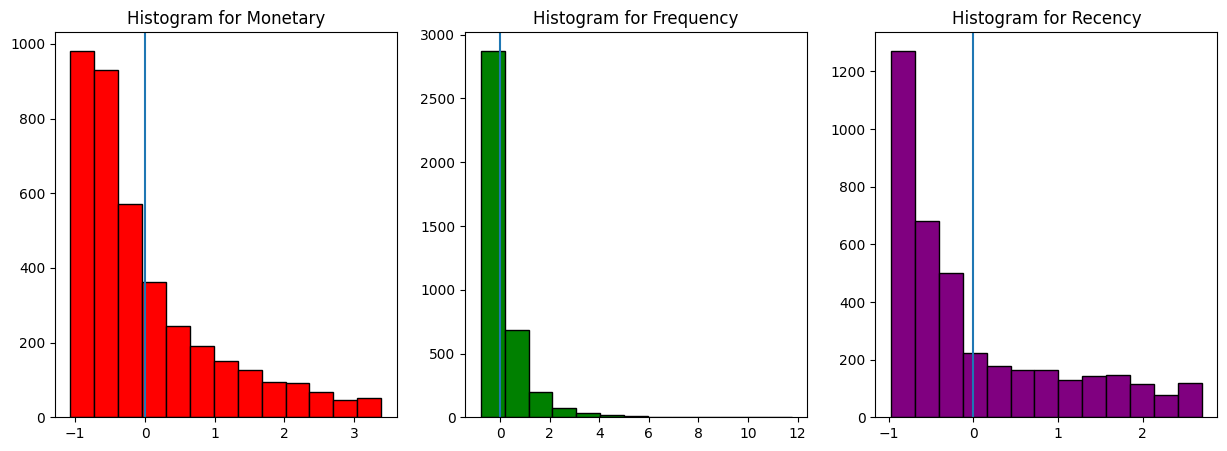

In [29]:
# Obtain the histograms.
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5), dpi = 100)

# Construct Histogram for 'Monetary'
axis[0].hist(scaled_df['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
axis[0].set_title("Histogram for Monetary")
axis[0].axvline(x=scaled_df['Monetary'].mean())
# Construct Histogram for 'Frequency'
axis[1].hist(scaled_df['Frequency'], bins = 'sturges', facecolor = 'green', edgecolor = 'black')
axis[1].set_title("Histogram for Frequency")
axis[1].axvline(x=scaled_df['Frequency'].mean())
# Construct Histogram for 'Recency'
axis[2].hist(scaled_df['Recency'], bins = 'sturges', facecolor = 'purple', edgecolor = 'black')
axis[2].set_title("Histogram for Recency")
axis[2].axvline(x=scaled_df['Recency'].mean())
plt.show()

Here we can see that all the columns now have same mean and variance. 

Applying K-Means Clustering

We start by finding the optimal number of clusters for the K-Means algorithm. We will use the Elbow method.

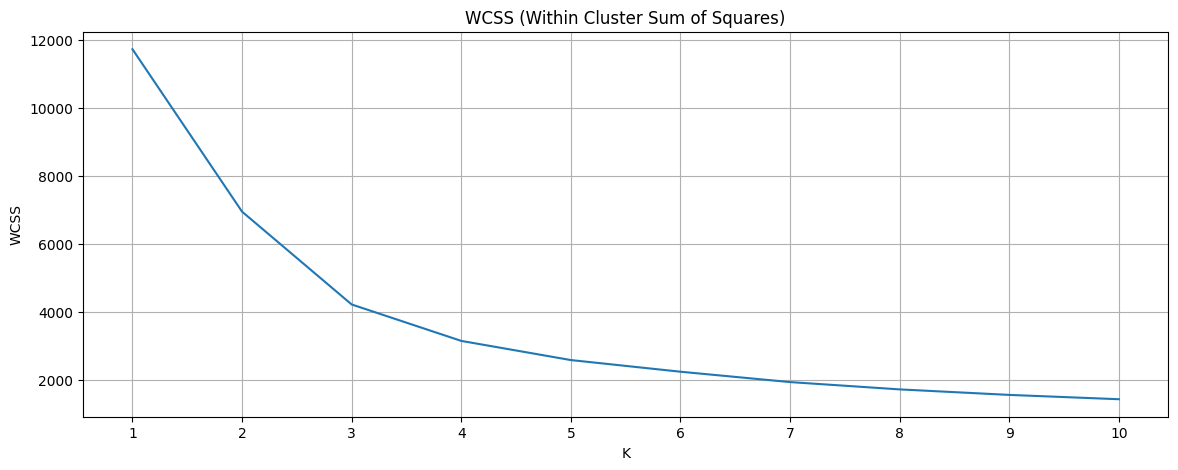

In [30]:
#  Determine 'K' using Elbow method.
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss = []

clusters = range(1, 11)
# Initiate a for loop that ranges from 1 to 10.
for k in clusters:
    # Inside for loop, perform K-means clustering for current value of K. Use 'fit()' to train the model.
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(scaled_df)
    # Find wcss for current K value using 'inertia_' attribute and append it to the empty list.
    wcss.append(kmeans.inertia_)

# Plot WCSS vs number of clusters.
plt.figure(figsize = (14, 5))
plt.title('WCSS (Within Cluster Sum of Squares)')
plt.plot(clusters, wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid()
plt.xticks(range(1,11))
plt.show()

From the above plot, it looks like decrease starts to slow down between 3 and 5. So you can choose any number of clusters from 3 to 5. Let us use 4 clusters to perform K-Means clustering.

In [31]:
#  Clustering the dataset for K = 4
from sklearn.cluster import KMeans

# Perform K-Means clustering with n_clusters = 4 and random_state = 10
kmeans_model = KMeans(n_clusters = 4, random_state = 10)

# Fit the model to the scaled_df
kmeans_model.fit(scaled_df)

# Make a series using predictions by K-Means
cluster_labels = pd.Series(kmeans_model.predict(scaled_df))
cluster_labels.value_counts()

1    2024
2     983
3     786
0     119
Name: count, dtype: int64

In [32]:
# Create a DataFrame with cluster labels for cluster visualisation
km_df = pd.concat([m_clean_df, cluster_labels], axis = 1)
km_df.columns = list(m_clean_df.columns) + ['Cluster Label']
km_df

,Monetary,Frequency,Recency,Cluster Label
0,1797.24,31,75,3
1,1757.55,73,19,3
2,334.40,17,310,2
3,2506.04,85,36,3
4,89.00,4,204,2
...,...,...,...,...
3907,180.60,10,278,2
3908,80.82,7,181,2
3909,178.05,12,8,1
3910,2094.88,756,4,0


In [33]:
# Visualising the clusters for customer segmentation
import plotly.express as px
px.scatter_3d(km_df, x = 'Monetary', y = 'Frequency', z = 'Recency', color = 'Cluster Label')


Summarising clusters:

In [34]:
#Understanding the Cluster Distribution
mean_df = km_df.groupby(['Cluster Label']).agg({'Recency':['mean'],
                                              'Frequency':['mean'],
                                              'Monetary':['mean','count']}).round(0)
mean_df

Recency Frequency Monetary      
                 mean      mean     mean count
Cluster Label                                 
0                24.0     374.0   2405.0   119
1                52.0      39.0    573.0  2024
2               255.0      24.0    380.0   983
3                42.0     119.0   2096.0   786

The above dataframe gives an optimal interpretation of clusters. Let us understand what each cluster represent.



- The <b><font color = blue>first cluster</font></b> (label 3) belongs to the "Promising Customers" segment as:
    - They purchased recently (`R = 52 days`).
    - Average purchase frequency is very less (`F = 39 purchases`).
    - They spend little (`M = 573 GBP`).

- The <b><font color= purple>second cluster</font></b> (label 0) belongs to the "Almost Lost Customers" segment as:
  - Their last purchase  is long ago (`R = 255 days`).
  - Average purchase frequency is very less (`F = 24 purchases`).
  - They spend very little (`M = 380 GBP`).

- The "best customers" are in <b><font color = orange>third cluster</font></b> (label 2) and <b><mark>fourth cluster</mark></b> (label 1). They spent the greatest amount of money, made many purchases and their last purchase was few days before.

Hence, we can see that using K-Means clustering we divided customers into clusters. Customers in each cluster have similar buying behaviours, so we can use them to personalise marketing offers.